In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
usedcars_df = pd.read_csv(r'data/data.csv')

In [3]:
usedcars_df['registration_date'] = pd.to_datetime(usedcars_df['registration_date'], errors='coerce')
usedcars_df['price_in_euro'] = pd.to_numeric(usedcars_df['price_in_euro'], errors='coerce')
usedcars_df['power_kw'] = pd.to_numeric(usedcars_df['power_kw'], errors='coerce')
usedcars_df['power_ps'] = pd.to_numeric(usedcars_df['power_ps'], errors='coerce')
usedcars_df['mileage_in_km'] = pd.to_numeric(usedcars_df['mileage_in_km'], errors='coerce')
usedcars_df = usedcars_df.drop("Unnamed: 0", axis=1)
usedcars_df = usedcars_df.drop("year", axis=1)
usedcars_df.info()

/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_6376/2078663017.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usedcars_df['registration_date'] = pd.to_datetime(usedcars_df['registration_date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     251079 non-null  object        
 1   model                     251079 non-null  object        
 2   color                     250913 non-null  object        
 3   registration_date         250882 non-null  datetime64[ns]
 4   price_in_euro             250880 non-null  float64       
 5   power_kw                  250786 non-null  float64       
 6   power_ps                  250869 non-null  float64       
 7   transmission_type         251079 non-null  object        
 8   fuel_type                 251079 non-null  object        
 9   fuel_consumption_l_100km  224206 non-null  object        
 10  fuel_consumption_g_km     251079 non-null  object        
 11  mileage_in_km             250927 non-null  float64       
 12  of

In [4]:
# Calculate IQR for numeric columns only
numeric_columns = usedcars_df.select_dtypes(include=['number'])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define limits for potential outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Removing outliers from the numeric columns
df_no_outliers_numeric = numeric_columns[~((numeric_columns < lower_limit) | (numeric_columns > upper_limit)).any(axis=1)]

# If you want to keep the non-numeric data in your dataframe:
usedcars_df = usedcars_df.loc[df_no_outliers_numeric.index]


                   registration_date  price_in_euro       power_kw  \
count                         220371  220371.000000  220268.000000   
mean   2016-09-19 12:52:33.583729152   20063.270780     107.874562   
min              1995-01-01 00:00:00     120.000000       1.000000   
25%              2013-12-01 00:00:00   11600.000000      81.000000   
50%              2018-03-01 00:00:00   18600.000000     103.000000   
75%              2020-08-01 00:00:00   26900.000000     132.000000   
max              2023-11-01 00:00:00   56890.000000     226.000000   
std                              NaN   11403.673555      38.369305   

            power_ps  mileage_in_km  
count  220364.000000  220409.000000  
mean      146.735951   82412.985690  
min         1.000000       0.000000  
25%       110.000000   26300.000000  
50%       140.000000   68800.000000  
75%       179.000000  125000.000000  
max       307.000000  278889.000000  
std        52.139723   67370.481189  
             brand         

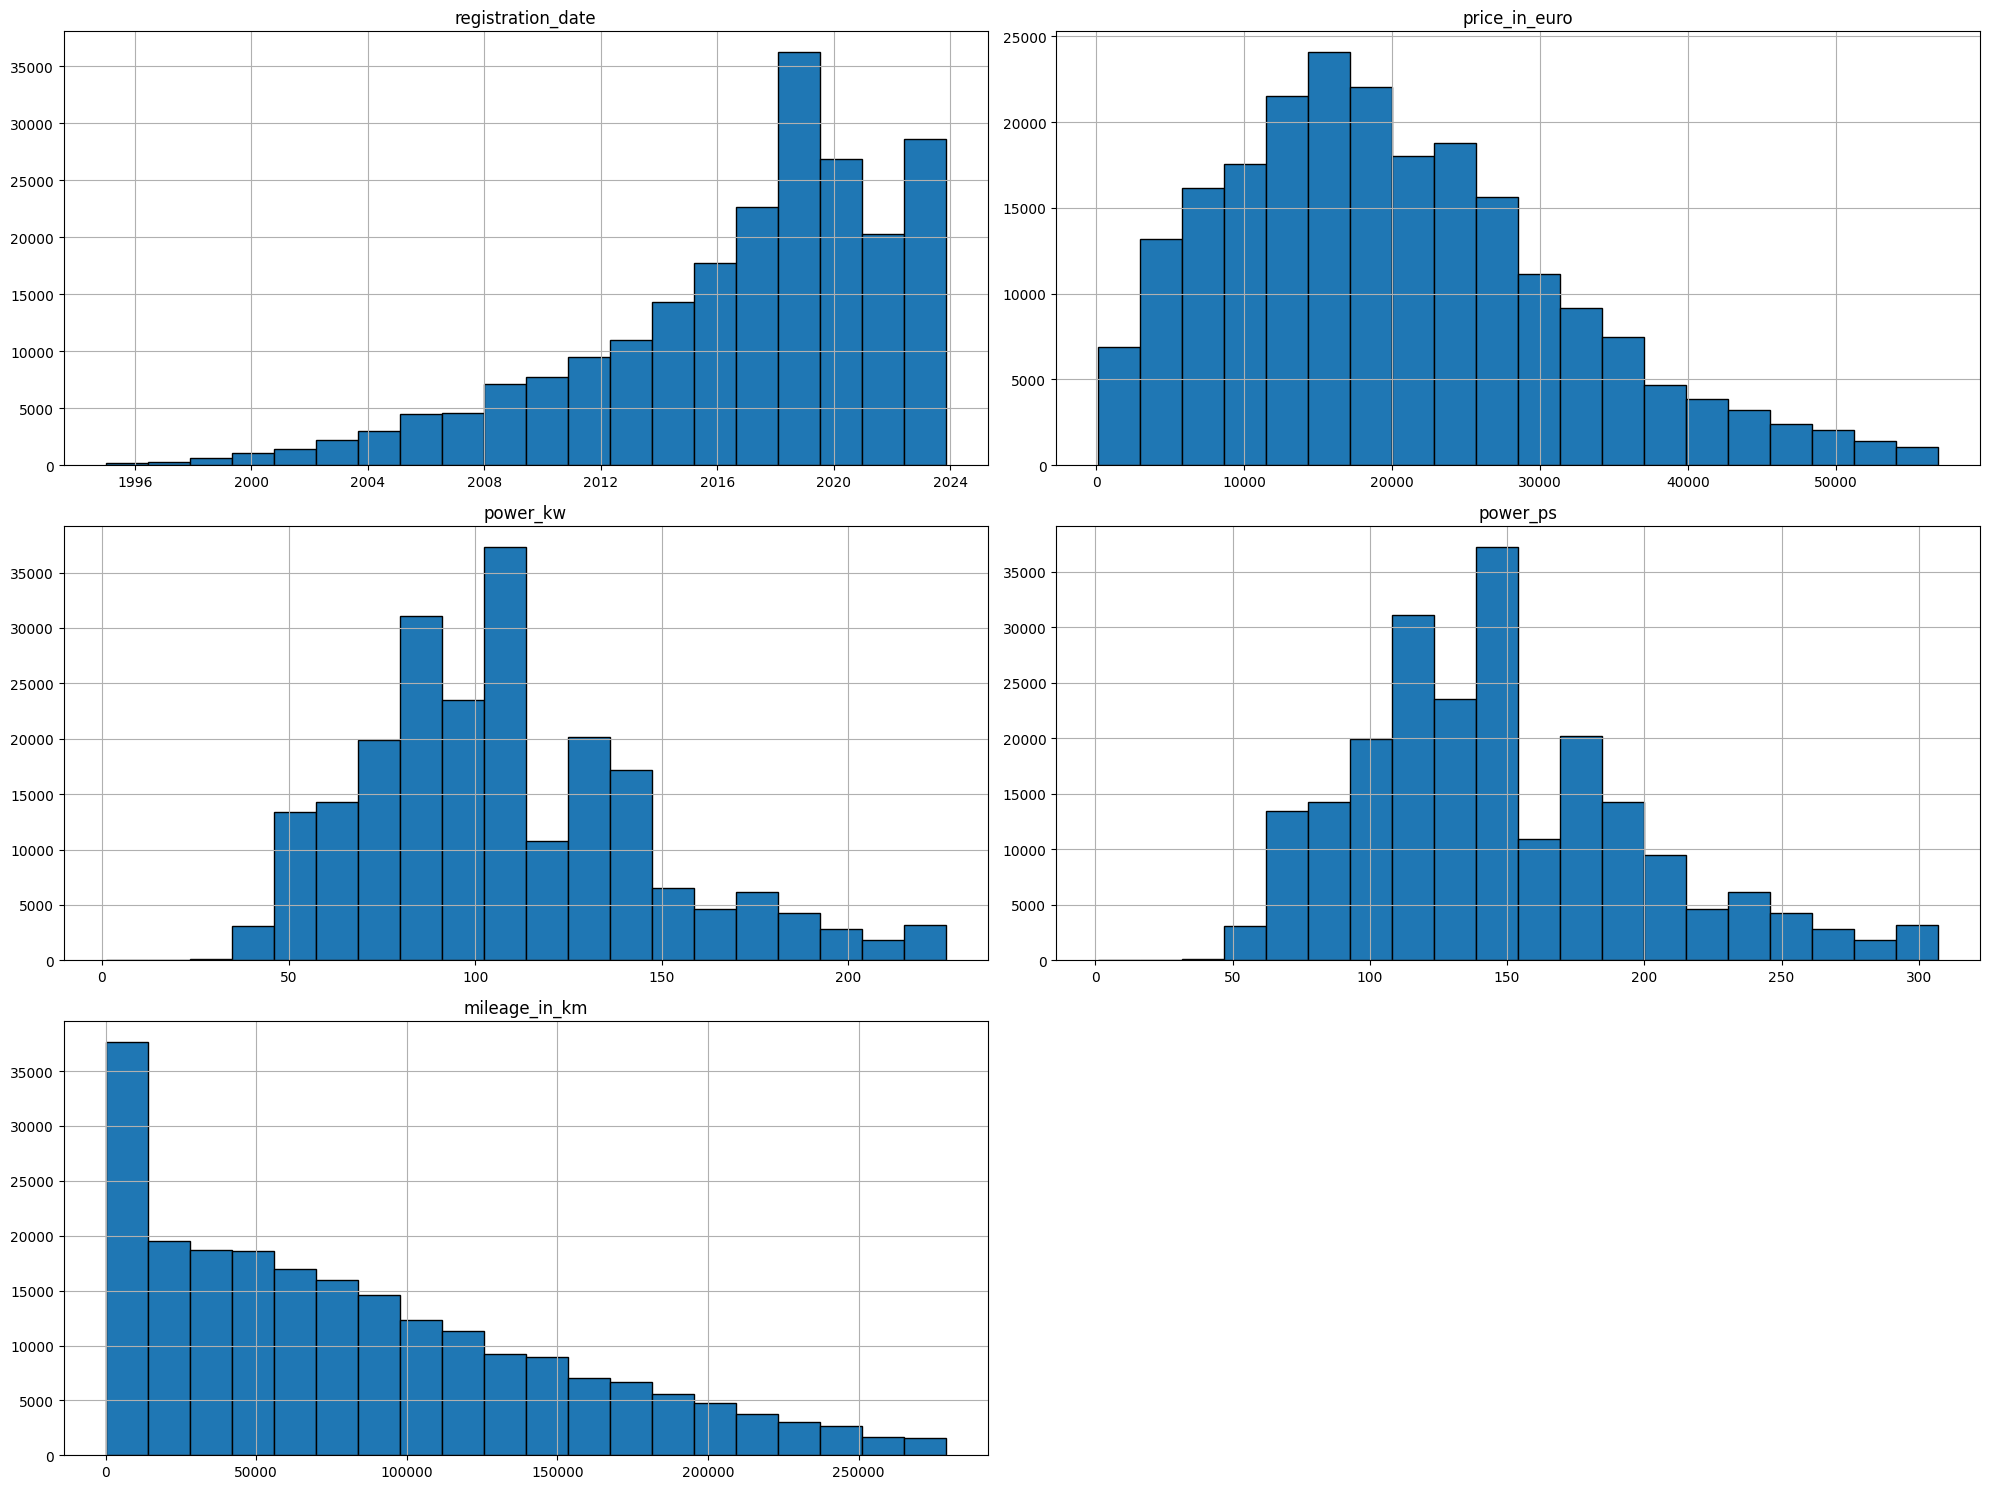

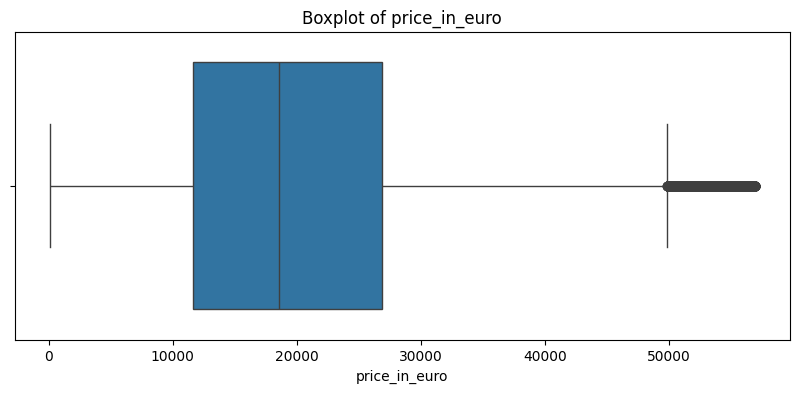

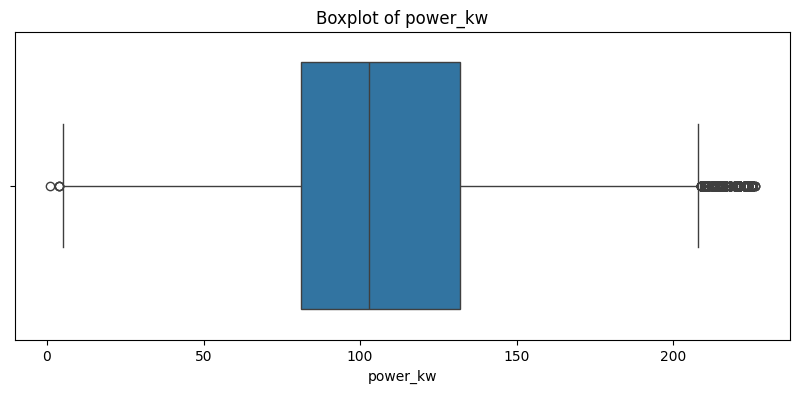

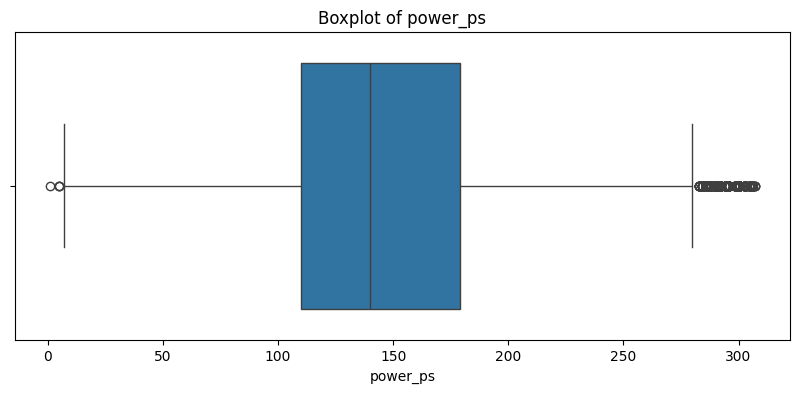

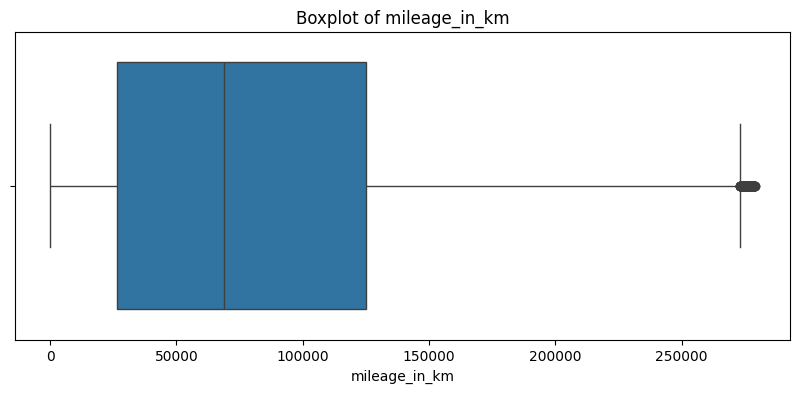

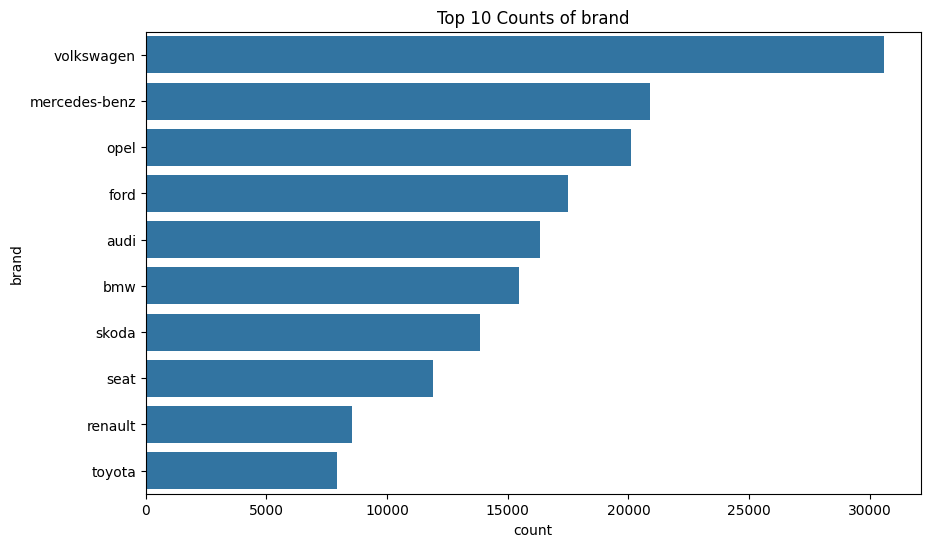

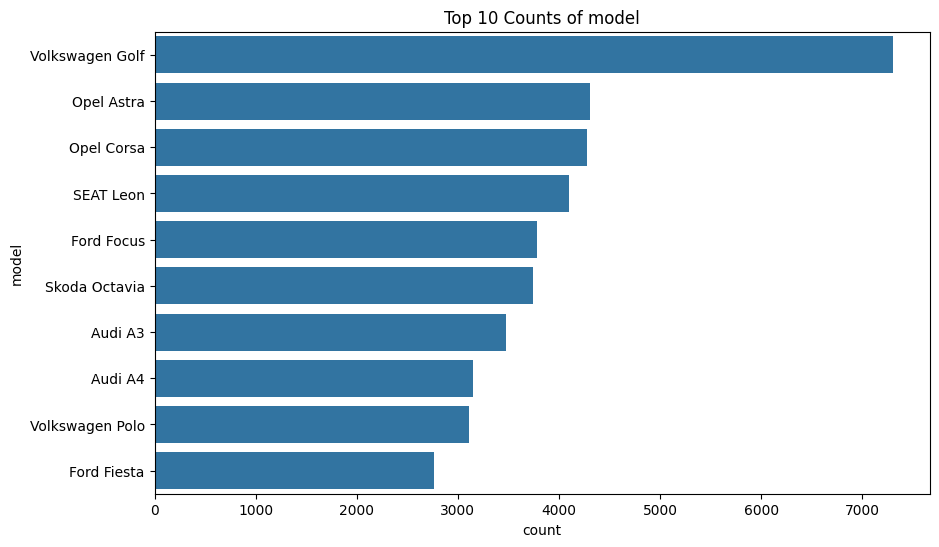

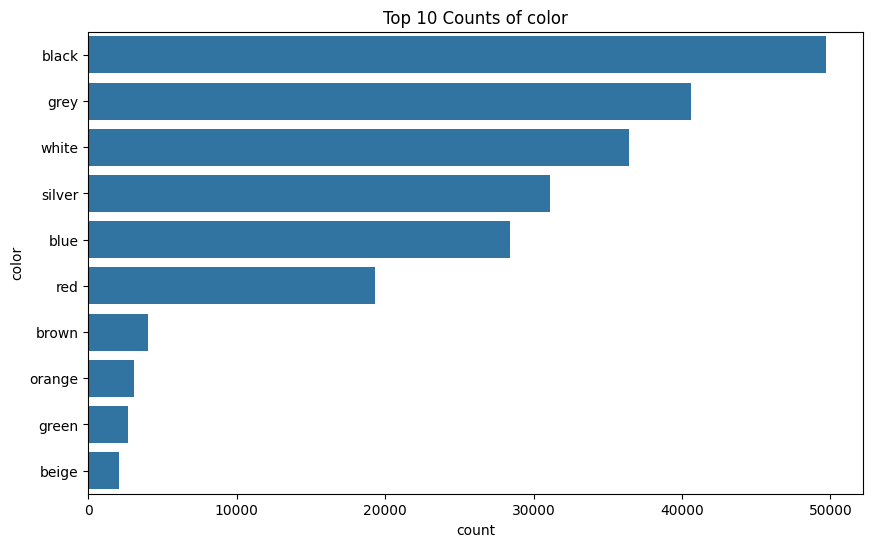

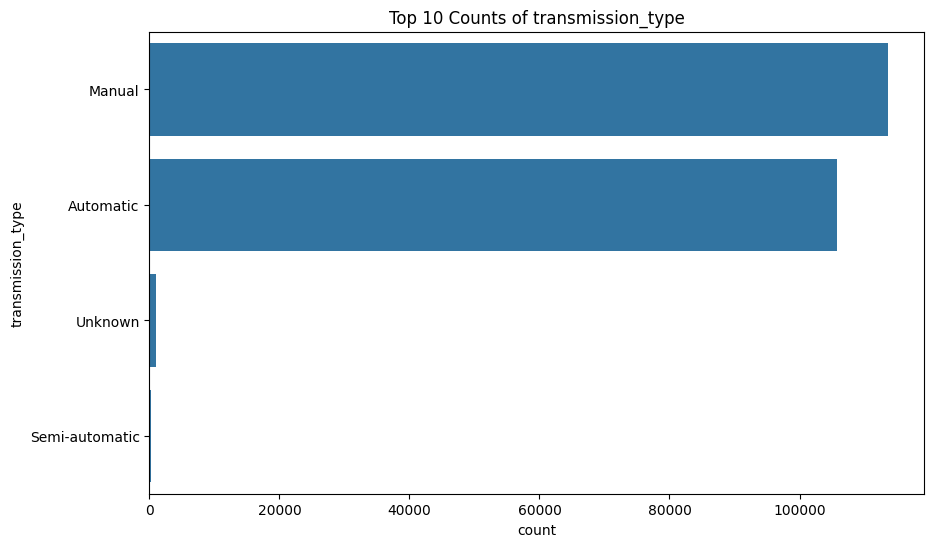

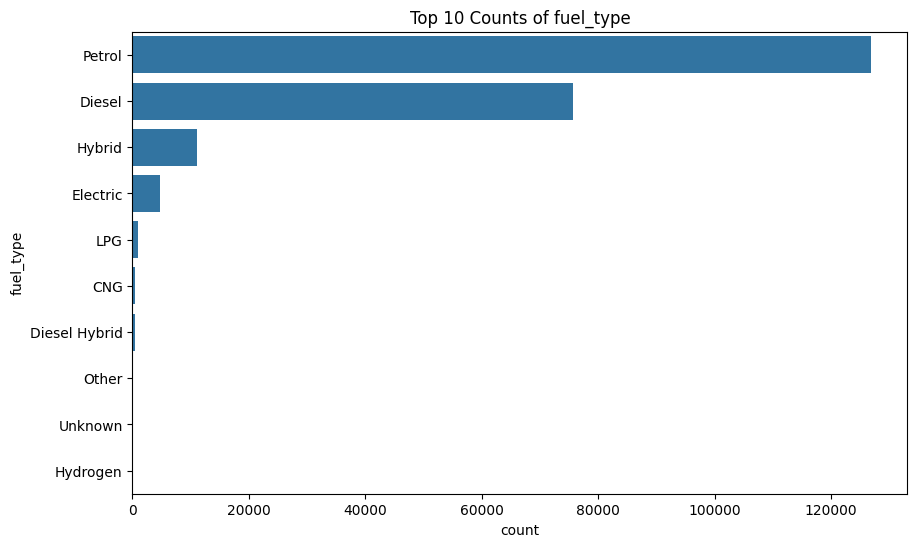

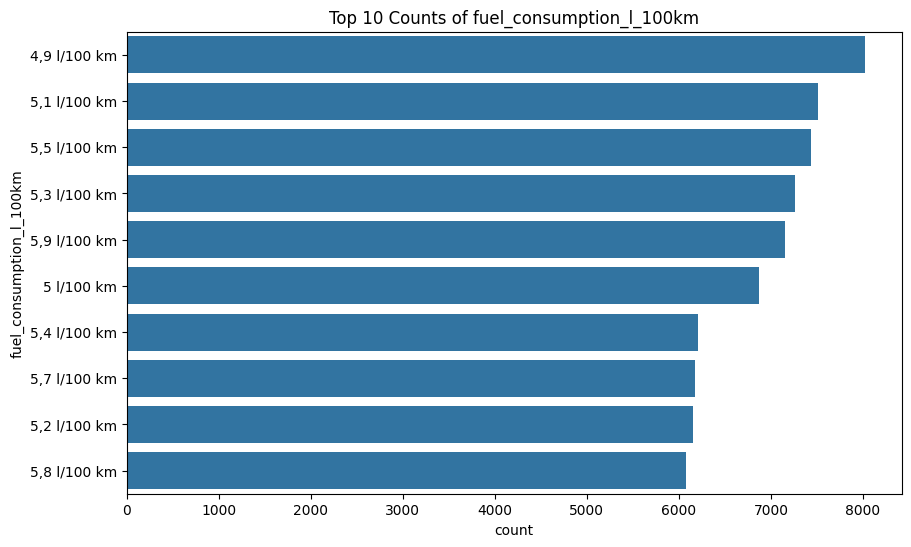

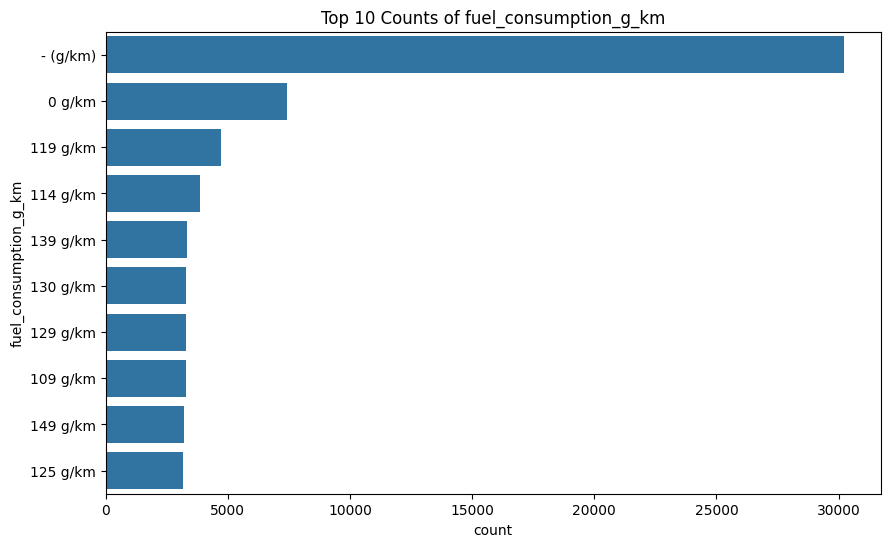

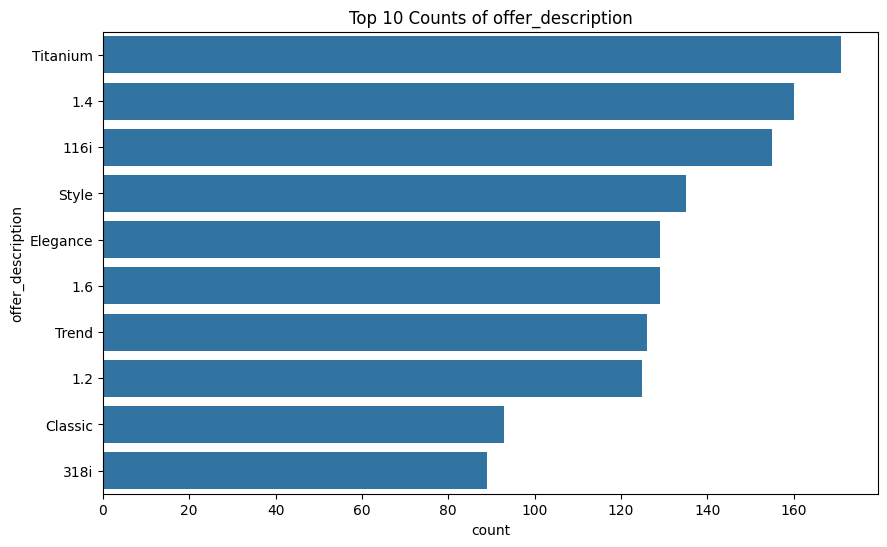

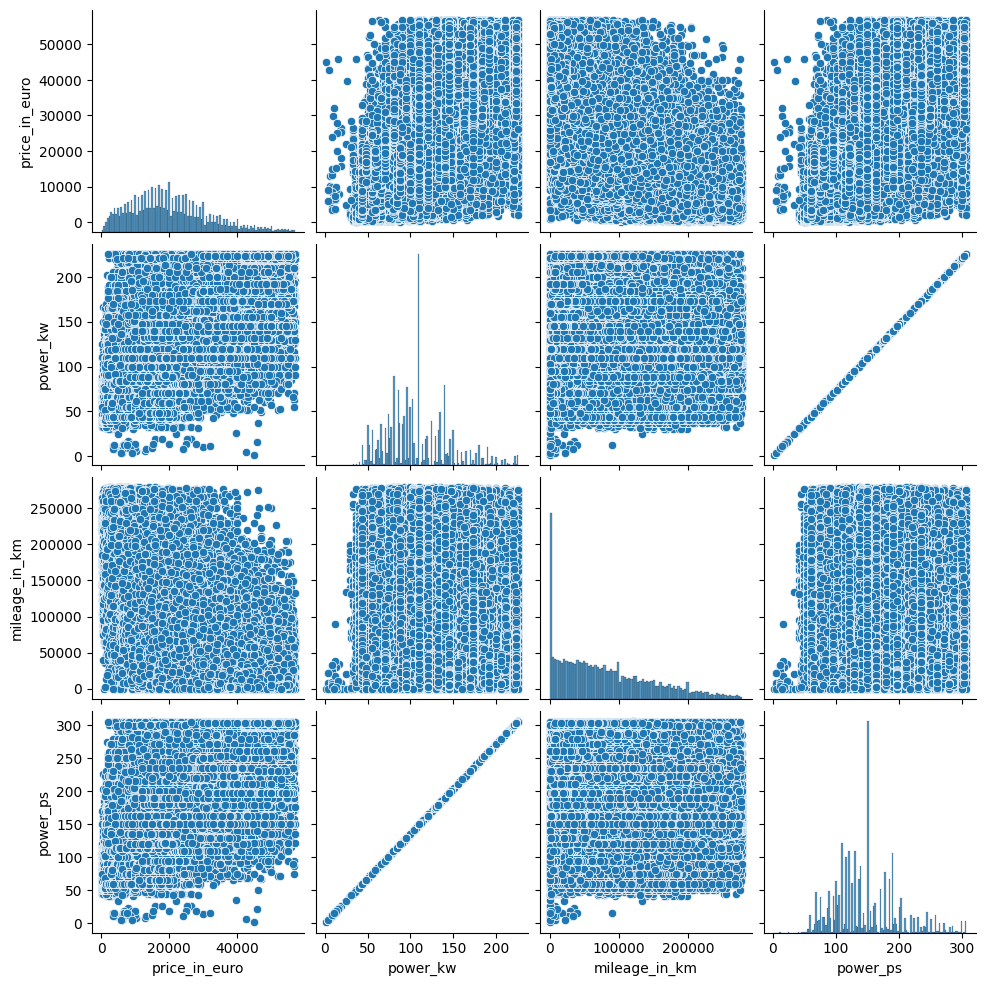

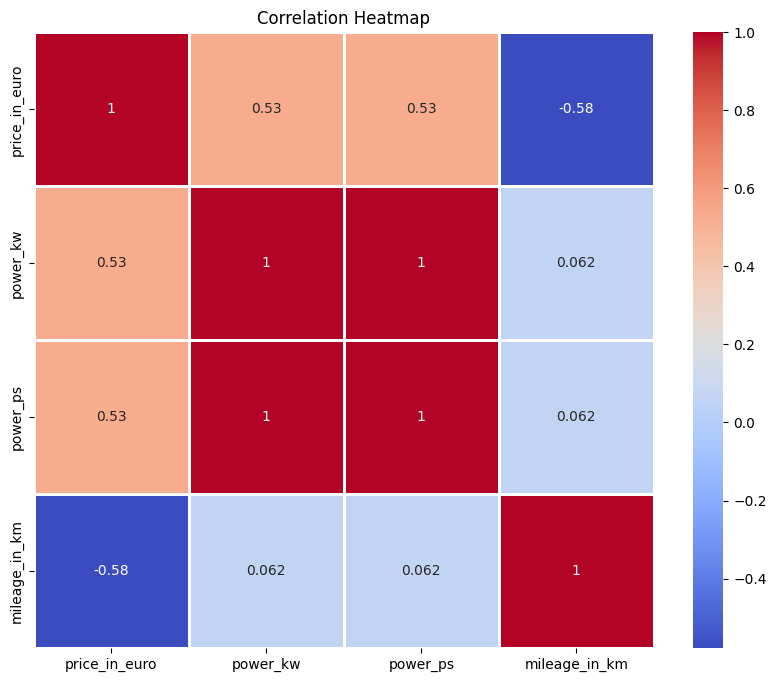

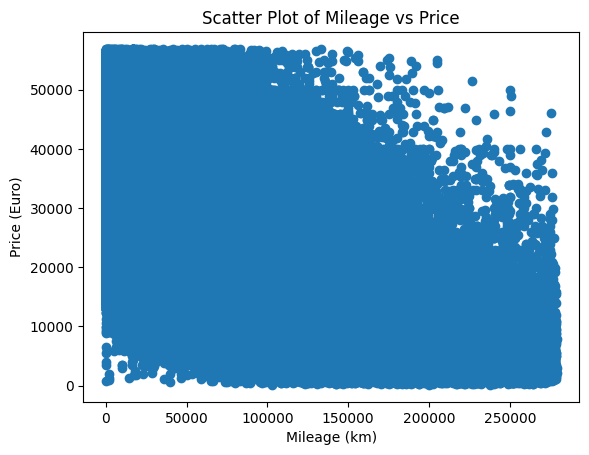

/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_6376/590294722.py:55: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(usedcars_df['price_in_euro'], bins=20)


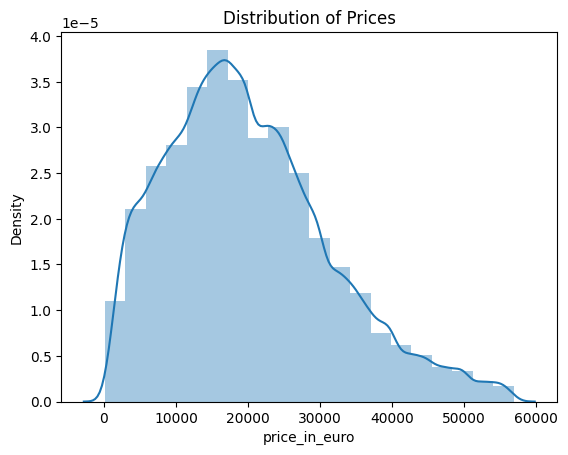

brand
maserati         39734.046729
porsche          38974.168026
land-rover       38159.076099
chrysler         37559.636364
jaguar           35510.620370
isuzu            35193.719577
volvo            32410.858394
jeep             31005.023271
cadillac         28770.493976
ssangyong        24999.424779
alfa-romeo       24957.376006
dodge            24325.152778
chevrolet        24207.388060
toyota           23580.777285
mazda            23188.981984
honda            22999.569878
mitsubishi       22802.020652
audi             22270.415544
skoda            22241.314083
kia              21959.393858
seat             21933.820161
nissan           21907.994059
mini             21772.095737
mercedes-benz    21335.250012
infiniti         20606.128205
hyundai          20304.049493
peugeot          19689.896832
bmw              19312.156298
citroen          19054.972532
ford             18722.563530
volkswagen       17272.361498
renault          17221.590214
fiat             15847.599319
daci

In [5]:
# Summary statistics for numerical features
print(usedcars_df.describe())

# Summary information on non-numerical data
print(usedcars_df.describe(include=['object', 'bool', 'category']))

# Count of unique values in each column
print(usedcars_df.nunique())

# Checking for missing values
print(usedcars_df.isnull().sum())

# Histograms for all numerical columns
usedcars_df.hist(bins=20, figsize=(20,15), edgecolor='black')
plt.tight_layout()
plt.show()

# Box plots for numerical columns to check for outliers
for column in usedcars_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=usedcars_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Count plots for categorical data to see the distribution of categorical features
# Count plots for categorical data to see the distribution of top 10 categories
for column in usedcars_df.select_dtypes(include=['object', 'bool', 'category']).columns:
    plt.figure(figsize=(10, 6))
    order = usedcars_df[column].value_counts().iloc[:10].index  # Selecting top 10 most frequent categories
    sns.countplot(y=usedcars_df[column], order=order)
    plt.title(f'Top 10 Counts of {column}')
    plt.show()


# Pair plot of selected features (can be resource-intensive with large datasets)
sns.pairplot(usedcars_df[['price_in_euro', 'power_kw', 'mileage_in_km', 'power_ps']])

# Assuming 'usedcars_df' is your dataframe
numeric_df = usedcars_df.select_dtypes(include=[np.number])  # This selects only the numeric columns

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()  # Compute the correlation matrix for numeric columns only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of important features
plt.scatter(x=usedcars_df['mileage_in_km'], y=usedcars_df['price_in_euro'])
plt.xlabel('Mileage (km)')
plt.ylabel('Price (Euro)')
plt.title('Scatter Plot of Mileage vs Price')
plt.show()

# Check the distribution of prices (target variable)
sns.distplot(usedcars_df['price_in_euro'], bins=20)
plt.title('Distribution of Prices')
plt.show()

# Any specific queries or groupings
average_price_per_brand = usedcars_df.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False)
print(average_price_per_brand)

In [6]:
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].fillna(0)

In [7]:
fuel_consumption_counts = usedcars_df.groupby(['fuel_type']).size()
print(fuel_consumption_counts.sort_values(ascending=False))


fuel_type
Petrol      126789
Diesel       75632
Hybrid       11170
Electric      4665
LPG            899
             ...  
06/2009          1
05/2023          1
05/2021          1
05/2015          1
07/2007          1
Length: 83, dtype: int64


In [8]:
transmission_type_counts = usedcars_df.groupby(['transmission_type']).size()
print(transmission_type_counts.sort_values(ascending=False))

transmission_type
Manual            113536
Automatic         105753
Unknown              971
Semi-automatic       255
dtype: int64


In [9]:
fuel_consumption_counts = usedcars_df.groupby(['mileage_in_km']).size()
print(fuel_consumption_counts.sort_values(ascending=False))

mileage_in_km
10.0        6362
50.0        1366
15.0        1141
20.0        1121
5.0         1065
            ... 
58501.0        1
58504.0        1
58510.0        1
58512.0        1
278889.0       1
Length: 65354, dtype: int64


### Removal of some values for columns fuel_type and transmission_type

In [10]:
fuel_types_to_keep = ["Petrol", "Diesel", "Hybrid"]

usedcars_df = usedcars_df[usedcars_df['fuel_type'].isin(fuel_types_to_keep)]

transmission_types_to_keep = ["Manual", "Automatic", "Semi"]

usedcars_df = usedcars_df[usedcars_df['transmission_type'].isin(transmission_types_to_keep)]

In [11]:
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212442 entries, 0 to 251073
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     212442 non-null  object        
 1   model                     212442 non-null  object        
 2   color                     212298 non-null  object        
 3   registration_date         212442 non-null  datetime64[ns]
 4   price_in_euro             212442 non-null  float64       
 5   power_kw                  212365 non-null  float64       
 6   power_ps                  212365 non-null  float64       
 7   transmission_type         212442 non-null  object        
 8   fuel_type                 212442 non-null  object        
 9   fuel_consumption_l_100km  212442 non-null  object        
 10  fuel_consumption_g_km     212442 non-null  object        
 11  mileage_in_km             212403 non-null  float64       
 12  offer_d

In [12]:
all_fuel_consumptions = usedcars_df["fuel_consumption_l_100km"].unique()
all_fuel_consumptions = list(all_fuel_consumptions)
print(all_fuel_consumptions)

['10,9 l/100 km', 0, '9,5 l/100 km', '7,2 l/100 km', '8,8 l/100 km', '13,4 l/100 km', '11 l/100 km', '9,2 l/100 km', '11,1 l/100 km', '11,7 l/100 km', '8,4 l/100 km', '8,2 l/100 km', '8,9 l/100 km', '11,4 l/100 km', '8,5 l/100 km', '8,3 l/100 km', '7,9 l/100 km', '8,7 l/100 km', '8,1 l/100 km', '12,2 l/100 km', '12 l/100 km', '5,8 l/100 km', '10 l/100 km', '6,7 l/100 km', '8,6 l/100 km', '12,5 l/100 km', '9,7 l/100 km', '12,1 l/100 km', '8 l/100 km', '7,5 l/100 km', '13,2 l/100 km', '6 l/100 km', '12,4 l/100 km', '6,8 l/100 km', '9,4 l/100 km', '5,9 l/100 km', '11,5 l/100 km', '6,2 l/100 km', '11,6 l/100 km', '6,1 l/100 km', '7,6 l/100 km', '5,2 l/100 km', '7,1 l/100 km', '6,9 l/100 km', '12,3 l/100 km', '6,5 l/100 km', '7,7 l/100 km', '4,6 l/100 km', '4,8 l/100 km', '4,5 l/100 km', '5,3 l/100 km', '6,4 l/100 km', '4,9 l/100 km', '6,6 l/100 km', '5,5 l/100 km', '5,4 l/100 km', '5,6 l/100 km', '5,7 l/100 km', '3,5 l/100 km', '4,4 l/100 km', '4,7 l/100 km', '4 l/100 km', '4,2 l/100 km', 

In [13]:
# Create a mask for rows that contain 'l/100 km' in 'fuel_consumption_l_100km'
mask = usedcars_df['fuel_consumption_l_100km'].astype(str).str.contains('l/100 km')

# Filter the DataFrame to keep only rows that meet the condition
filtered_df = usedcars_df[mask]

# Calculate the percentage of rows with the correct format
pct_of_correct_format = len(filtered_df) / len(usedcars_df) * 100

print(f'Percentage of rows that have the correct format: {pct_of_correct_format:.2f}%')

Percentage of rows that have the correct format: 91.93%


In [14]:
usedcars_df = filtered_df

# Remove 'l/100 km' from the 'fuel_consumption_l_100km' column
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].str.replace(' l/100 km', '', regex=False)
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].replace('- (l/100 km)', 0)

# Convert the column to float
usedcars_df['fuel_consumption_l_100km'] = usedcars_df['fuel_consumption_l_100km'].astype(float)

# Display the DataFrame to confirm changes
usedcars_df.head()

,brand,model,color,registration_date,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,1995-10-01,1300.0,148.0,201.0,Manual,Petrol,10.9,260 g/km,160500.0,2.0 V6 TB
3,alfa-romeo,Alfa Romeo Spider,black,1995-07-01,4900.0,110.0,150.0,Manual,Petrol,9.5,225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,1996-11-01,17950.0,132.0,179.0,Manual,Petrol,7.2,- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,alfa-romeo,Alfa Romeo Spider,red,1996-04-01,7900.0,110.0,150.0,Manual,Petrol,9.5,225 g/km,47307.0,2.0 16V Twin Spark
6,alfa-romeo,Alfa Romeo 145,red,1996-12-01,3500.0,110.0,150.0,Manual,Petrol,8.8,210 g/km,230000.0,Quadrifoglio


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(column, df, bins=50, remove_outliers=False, log_transform=False):
    data = df[column]

    if remove_outliers:
        # Removing the top 1% as an example
        quantile_limit = data.quantile(0.99)
        data = data[data <= quantile_limit]

    if log_transform and data.min() > 0:
        # Apply log transformation if the data is suitable (no zero or negative values)
        data = np.log(data)

    data.plot(kind='hist', bins=bins)
    plt.title(f'Histogram of {column}' + (' (Log Transformed)' if log_transform else ''))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

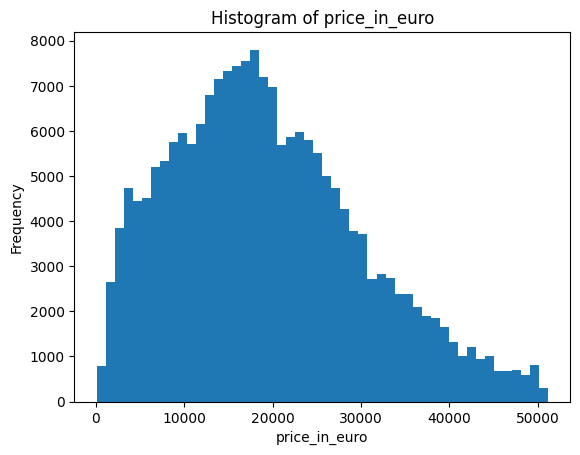

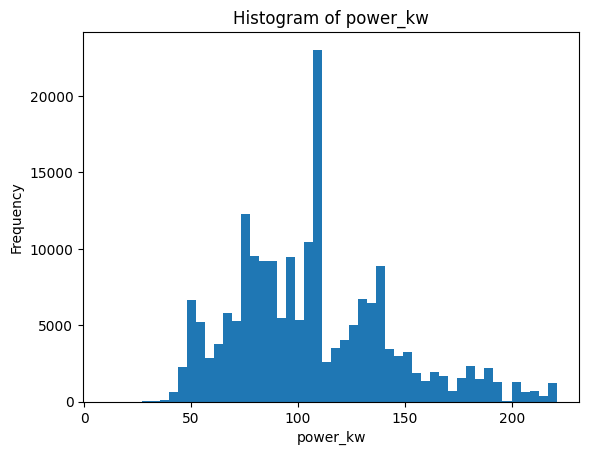

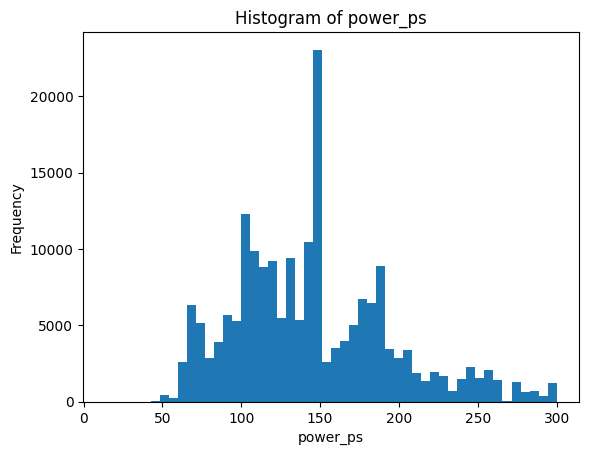

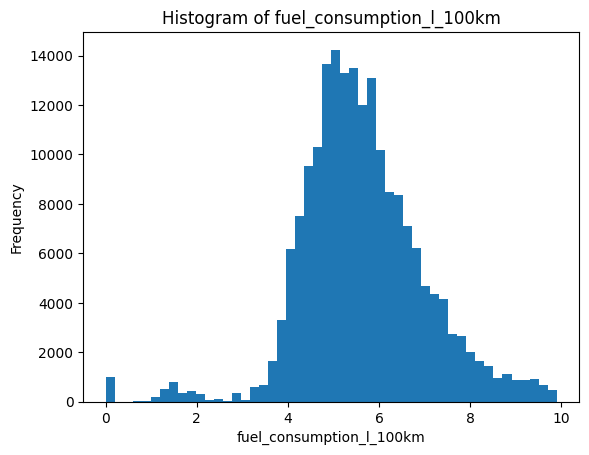

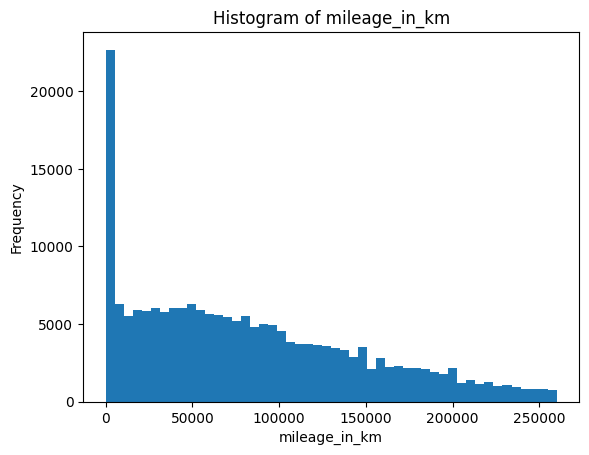

In [16]:
# Loop through each column in the DataFrame
for column in usedcars_df.columns:
    # Check if the column is of float type
    if usedcars_df[column].dtype == 'float64':
        plot_histogram(column, usedcars_df, remove_outliers=True, log_transform=False)


### Remove rows that have 0 kms for the column "mileage_in_km"

In [17]:
# Remove rows where mileage_in_km is 0
usedcars_df = usedcars_df[usedcars_df['mileage_in_km'] != 0]

In [18]:
numerical_columns = []

for column in usedcars_df.columns:
    # Check if the column is of float type
    if usedcars_df[column].dtype == 'float64':
        numerical_columns.append(column)
print(numerical_columns)

['price_in_euro', 'power_kw', 'power_ps', 'fuel_consumption_l_100km', 'mileage_in_km']


In [19]:
correlation_matrix = usedcars_df[numerical_columns].corr()
correlation_matrix

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,mileage_in_km
price_in_euro,1.000000,0.518021,0.518148,-0.028537,-0.579544
power_kw,0.518021,1.000000,0.999982,0.193069,0.074846
power_ps,0.518148,0.999982,1.000000,0.192923,0.074680
fuel_consumption_l_100km,-0.028537,0.193069,0.192923,1.000000,0.140715
mileage_in_km,-0.579544,0.074846,0.074680,0.140715,1.000000


In [20]:
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195141 entries, 0 to 251073
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     195141 non-null  object        
 1   model                     195141 non-null  object        
 2   color                     195005 non-null  object        
 3   registration_date         195141 non-null  datetime64[ns]
 4   price_in_euro             195141 non-null  float64       
 5   power_kw                  195084 non-null  float64       
 6   power_ps                  195084 non-null  float64       
 7   transmission_type         195141 non-null  object        
 8   fuel_type                 195141 non-null  object        
 9   fuel_consumption_l_100km  195141 non-null  float64       
 10  fuel_consumption_g_km     195141 non-null  object        
 11  mileage_in_km             195103 non-null  float64       
 12  offer_d

In [21]:
# For numerical columns
usedcars_df['power_kw'] = usedcars_df['power_kw'].fillna(usedcars_df['power_kw'].median())
usedcars_df['mileage_in_km'] = usedcars_df['mileage_in_km'].fillna(usedcars_df['mileage_in_km'].median())

# For categorical columns
usedcars_df['color'] = usedcars_df['color'].fillna('Unknown')

/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_6376/2590727564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars_df['power_kw'] = usedcars_df['power_kw'].fillna(usedcars_df['power_kw'].median())
/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_6376/2590727564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars_df['mileage_in_km'] = usedcars_df['mileage_in_km'].fillna(usedcars_df['mileage_in_km'].median())
/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_63

In [22]:
nan_percentage = (usedcars_df.isna().sum() / len(usedcars_df)) * 100
print(nan_percentage)

brand                       0.00000
model                       0.00000
color                       0.00000
registration_date           0.00000
price_in_euro               0.00000
power_kw                    0.00000
power_ps                    0.02921
transmission_type           0.00000
fuel_type                   0.00000
fuel_consumption_l_100km    0.00000
fuel_consumption_g_km       0.00000
mileage_in_km               0.00000
offer_description           0.00000
dtype: float64


In [23]:
usedcars_df['power_ps'].fillna(usedcars_df['power_ps'].mean(), inplace=True)


/var/folders/22/4rkd_km14n587vm5mk020x800000gq/T/ipykernel_6376/2047706967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars_df['power_ps'].fillna(usedcars_df['power_ps'].mean(), inplace=True)


In [24]:
usedcars_df = usedcars_df.drop(['power_kw'], axis=1)

In [25]:
nan_percentage = (usedcars_df.isna().sum() / len(usedcars_df)) * 100
print(nan_percentage)

brand                       0.0
model                       0.0
color                       0.0
registration_date           0.0
price_in_euro               0.0
power_ps                    0.0
transmission_type           0.0
fuel_type                   0.0
fuel_consumption_l_100km    0.0
fuel_consumption_g_km       0.0
mileage_in_km               0.0
offer_description           0.0
dtype: float64


In [26]:
usedcars_df['registration_date'] = usedcars_df['registration_date'].dt.year

In [27]:
list_of_models = usedcars_df['brand'].unique().tolist()
list_of_models = usedcars_df['brand'].unique().tolist()
list_of_models = usedcars_df['brand'].unique().tolist()
list_of_models = usedcars_df['brand'].unique().tolist()


In [28]:
usedcars_df.to_parquet(r'data/transformed_data.parquet', engine='fastparquet')